<a href="https://colab.research.google.com/github/giulioaudone/House-prices-in-California/blob/main/House_prices_in_California.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal of the analysis

1. How do house prices vary across different regions of California?
2. Is there a correlation between median income and median house value?
3. Which factors have the greatest influence on house prices?
4. Are houses near the ocean more expensive?

# Import of pandas

In [ ]:
import pandas as pd

# Import of the csv

In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Data cleaning and data preparation

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
df.info() #See general infos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [ ]:
df.describe() #See interesting infos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [ ]:
df.isnull() #Check null

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2995,False,False,False,False,False,False,False,False,False
2996,False,False,False,False,False,False,False,False,False
2997,False,False,False,False,False,False,False,False,False
2998,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum() #Check null sum

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


In [ ]:
df.duplicated() #Check duplicated

,0
0,False
1,False
2,False
3,False
4,False
...,...
2995,False
2996,False
2997,False
2998,False


In [ ]:
df.duplicated().sum() #Check duplicated sum

0

# Distribution of the prices of the houses

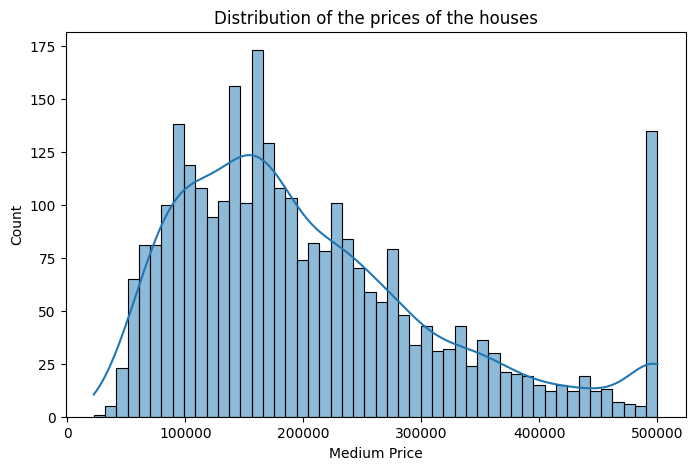

In [ ]:
#Let's import other libraries to plot graphs
import seaborn as sns
import matplotlib.pyplot as plt

#Let's plot a histogram to see the distribution of the prices of the houses
plt.figure(figsize=(8,5))
sns.histplot(df['median_house_value'], bins=50, kde=True) #I want an histogram
plt.title("Distribution of the prices of the houses") #The title of the graph
plt.xlabel("Medium Price") #Let's give a name to the x label
plt.show()

The graph shows that the majority of houses have a median price between 100000 and 200000. However, there is a noticeable peak at 500000, which may indicate a data cap rather than a true outlier. This could be linked to price limitations in the dataset, where all the homes above 500000 are reported at this value.

# Correlation between medium income and the medain value of the house

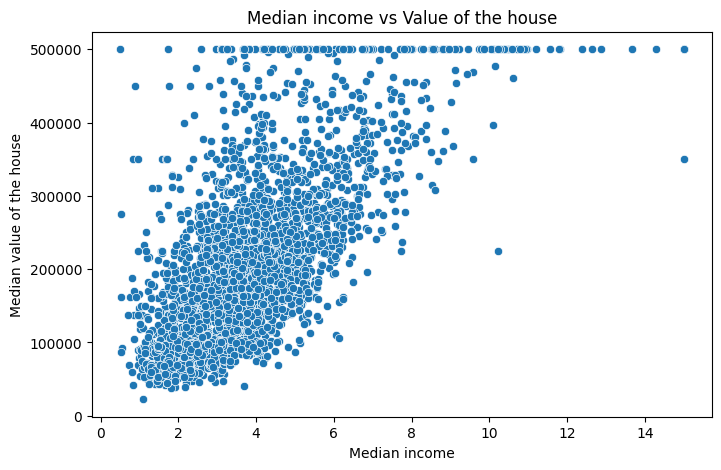

                    median_income  median_house_value
median_income            1.000000            0.672695
median_house_value       0.672695            1.000000


In [ ]:
#Let's find out if there is a correlation between medium income and the medain value of the house
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['median_income'], y=df['median_house_value'])
plt.title("Median income vs Value of the house")
plt.xlabel("Median income")
plt.ylabel("Median value of the house")
plt.show()

# Let's calcolate the correlation
print(df[['median_income', 'median_house_value']].corr())

We can see that higher-income areas tend to have higher house prices, but the presence of outliers suggests that other factors (such as location, housing demand, and supply constraints) also play a role in determining property values.

# Geographical distribution of the prices of the houses

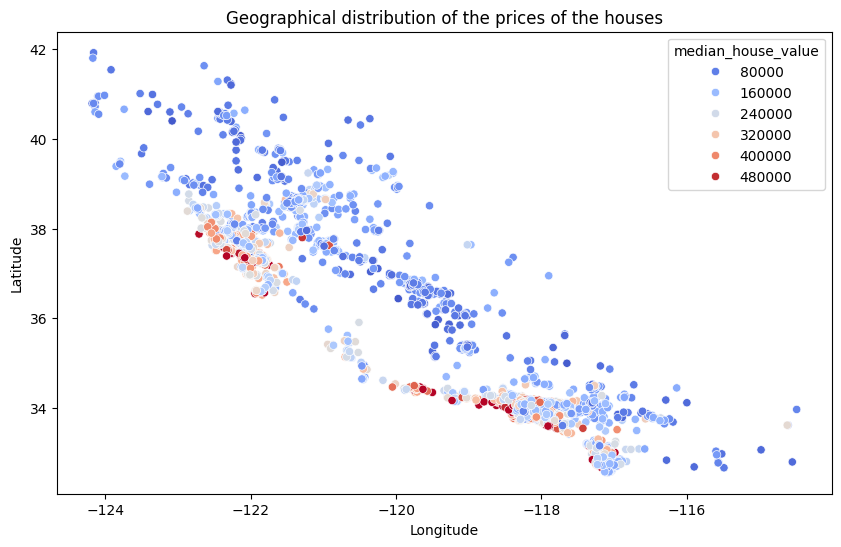

In [ ]:
#Let's find the geographical distribution of the prices of the houses
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['median_house_value'], palette="coolwarm") #I want a scatterplot
plt.title("Geographical distribution of the prices of the houses")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

We can see that there are some geographical areas with a high median value of the houses

# Relation between the number of rooms and the price of the house

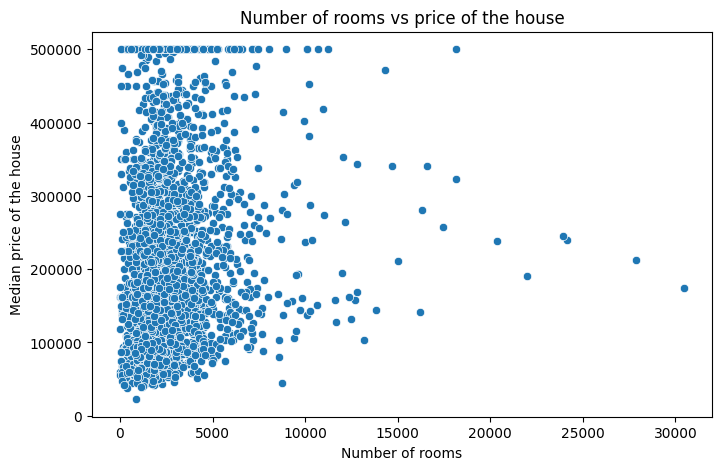

In [ ]:
#Let's see the relation between the number of rooms and the price of the house
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['total_rooms'], y=df['median_house_value'])
plt.title("Number of rooms vs price of the house")
plt.xlabel("Number of rooms")
plt.ylabel("Median price of the house")
plt.show()

We can see that the number of rooms does not have a huge impact on the prices, however there are some cases where the number of the rooms can be a factor.

# Matrix of correlation of the variables

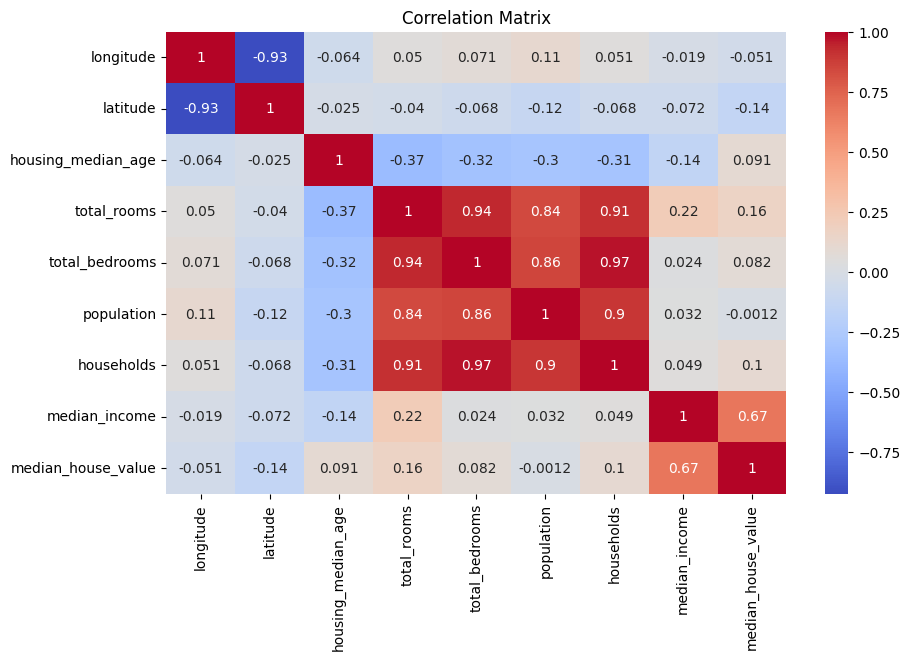

In [ ]:
#Let's see the matrix of correlation of the variables
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm") #I want a heatmap
plt.title("Correlation Matrix")
plt.show()

From the matrix we can see that:
- Median income is the most important factor affecting house prices.
- Location (latitude/longitude) could be another crucial factor influencing property values.
- More rooms generally mean more bedrooms, but this doesn’t strongly impact house value.
- The number of households and population density are closely related but don’t directly impact house prices.

# Population over value of the houses

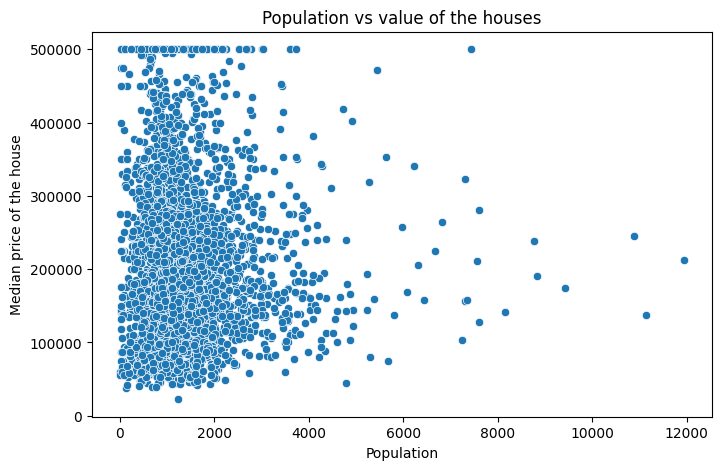

In [ ]:
#Population over value of the houses
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['population'], y=df['median_house_value'])
plt.title("Population vs value of the houses")
plt.xlabel("Population")
plt.ylabel("Median price of the house")
plt.show()

We can see easily from the graph that the population is not a big factor in the price of the houses, however we can see some outliers where population can be a factor.

# Correlation between the region and the price of houses

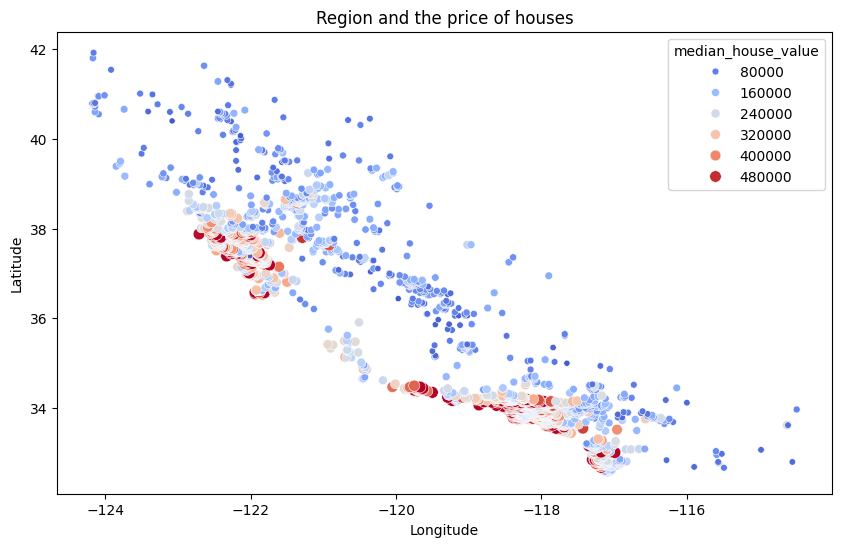

In [ ]:
#Let's see the correlation between the region and the price of houses
#To find the region I'll grouping by longitude and latitude
df_grouped = df.groupby(['latitude', 'longitude'])['median_house_value'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(x=df_grouped['longitude'], y=df_grouped['latitude'], hue=df_grouped['median_house_value'], palette="coolwarm", size=df_grouped['median_house_value'])
plt.title("Region and the price of houses")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

We can see that there are some regions with much higher prices than other, we can conclude so that the region is a really important factor in the price of the houses

# Analysis of the number of houses per area

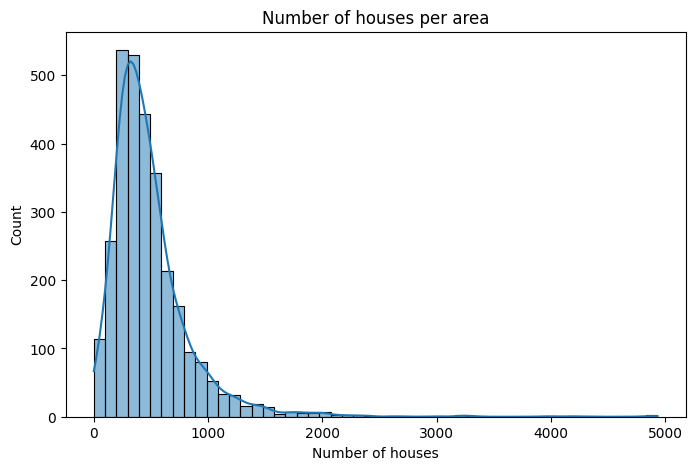

In [ ]:
#Analysis of the number of houses per area
plt.figure(figsize=(8,5))
sns.histplot(df['households'], bins=50, kde=True)
plt.title("Number of houses per area")
plt.xlabel("Number of houses")
plt.show()


We can see that:
- Most areas have a relatively small number of houses, suggesting a mix of suburban and rural settings.
- A few regions have a high density of households, likely representing urbanized zones.
- The distribution is not uniform, indicating a strong variation in housing density across different locations.

# Number of bedrooms vs value of the house



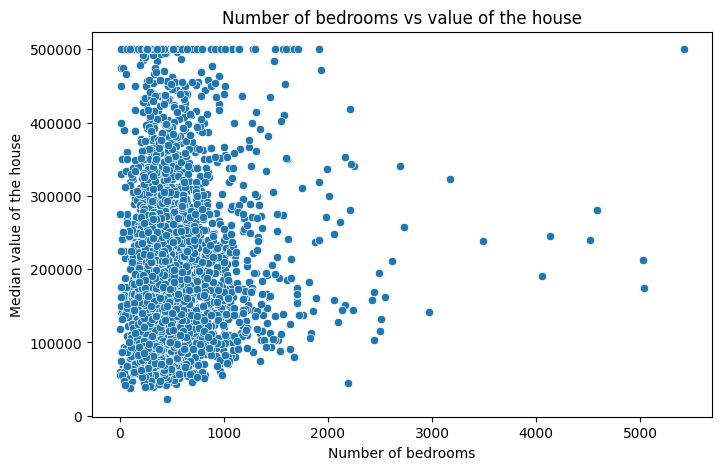

In [ ]:
#Number of bedrooms vs value of the house
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['total_bedrooms'], y=df['median_house_value'])
plt.title('Number of bedrooms vs value of the house')
plt.xlabel("Number of bedrooms")
plt.ylabel("Median value of the house")
plt.show()

We can see that the number of bedrooms does not impact a lot the price of the house, however in few cases the number of bedrooms influence the value of the house

# Distribution of housing density

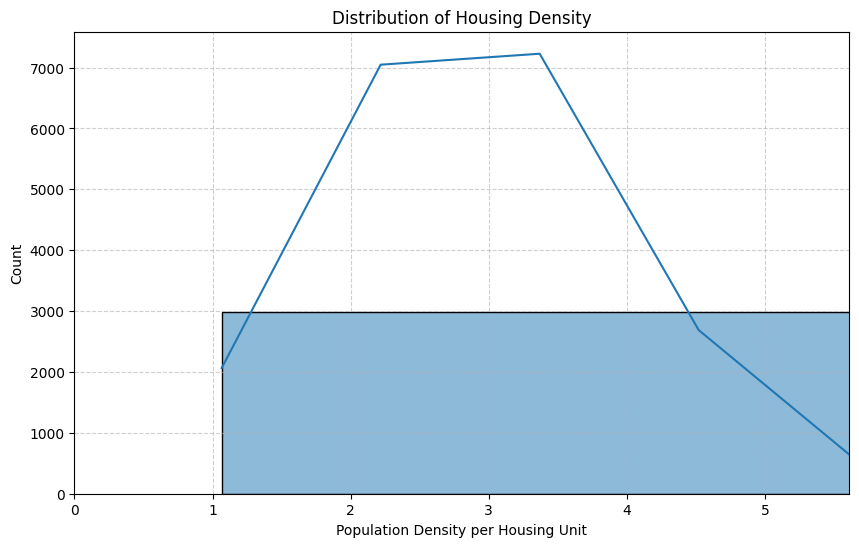

In [ ]:
#Distribution of housing density
df['density'] = df['population'] / df['households']

# Define a  x-axis limit to remove extreme outliers
x_max = df['density'].quantile(0.99)  # 99th percentile to exclude extreme values

plt.figure(figsize=(10, 6))
sns.histplot(df['density'], bins=30, kde=True)
plt.xlim(0, x_max)
plt.grid(True, linestyle="--", alpha=0.6)
plt.title('Distribution of Housing Density')
plt.xlabel('Population Density per Housing Unit')
plt.ylabel('Count')

plt.show()

We can understand from the graph that most of the population density per housing unit is between 2 and 4

# Conclusion / answer to the questions

- House prices vary significantly across different regions, with higher prices near the ocean.
- Median income is strongly correlated with house value (positive correlation).
- Factors such as housing density, the number of rooms, and population influence house value.
- Houses near the ocean tend to be more expensive, as confirmed by the geographic price map.